In [1]:
import os
import pandas as pd
path = os.path.join(os.path.expanduser('./'),'dataset', 'KDDTrain+_20Percent.txt')
panda = pd.read_csv(path, header=0).as_matrix()

df = pd.DataFrame(panda[:,:41])


df.columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]
#print(df.loc[:,['srv_rerror_rate']])

x  = df.loc[:,['duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate']]

#print(x)

y = pd.DataFrame(panda[:,41:42])
y.columns = ['Targets']

y1 = y.replace(['normal', 'anomaly'], [1, 0])
for i in range(len(y1)):
    if y1.iat[i,0] != y1.iat[2,0]:
        y1.set_value(y1.index[i],'Targets',0)




In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import os
from numpy import array
 
# Only needed if you want to display your plots inline if using Notebook
# change inline to auto if you have Spyder installed
%matplotlib inline


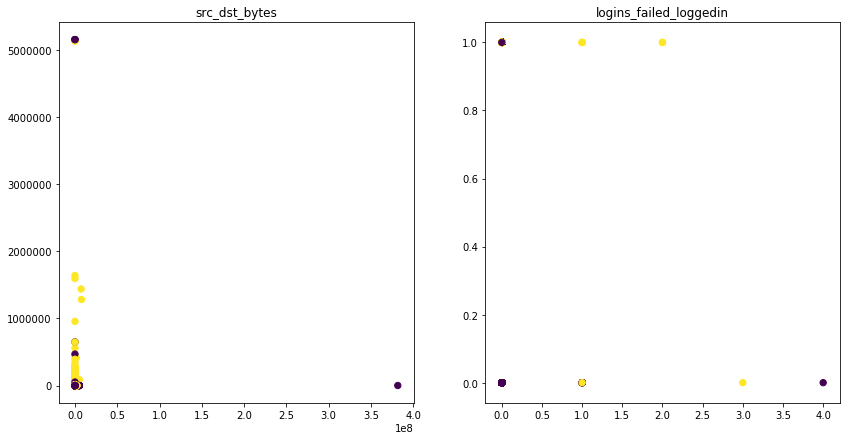

In [3]:
# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap
c=y1.Targets
# Plot Sepal
plt.subplot(1, 2, 1)
nd=x.dst_bytes

colors = np.random.rand(len(x.src_bytes))
plt.scatter(x.src_bytes, x.dst_bytes, s=40,c=c )
plt.title('src_dst_bytes')
 
plt.subplot(1, 2, 2)
plt.scatter(x.num_failed_logins, x.logged_in, c=c, s=40)
plt.title('logins_failed_loggedin')

In [4]:
# K Means Cluster
model = KMeans(n_clusters=2)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
# This is what KMeans thought
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

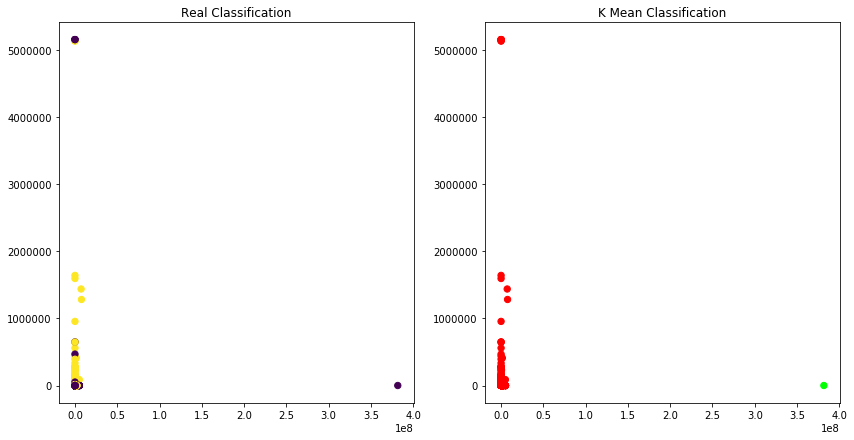

In [6]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.src_bytes, x.dst_bytes, c=c, s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.src_bytes, x.dst_bytes, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')

In [7]:
# The fix, we convert all the 1s to 0s and 0s to 1s.
predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print (model.labels_)
print (predY)

[0 0 0 ..., 0 0 0]
[1 1 1 ..., 1 1 1]


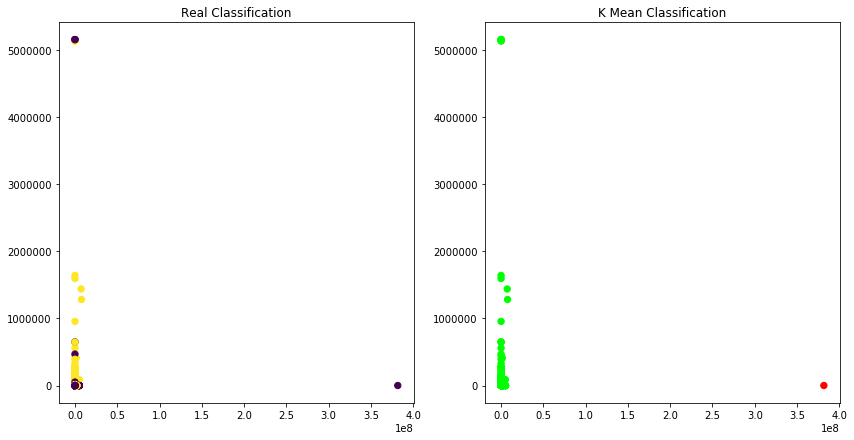

In [8]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime'])
 
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(x.src_bytes, x.dst_bytes, c=c, s=40)
plt.title('Real Classification')
 
# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(x.src_bytes, x.dst_bytes, c=colormap[predY], s=40)
plt.title('K Mean Classification')

In [9]:

score =0
for i in range(0,len(y1)):
    if y1.Targets[i]!=predY.item(i):
        score = score +1
    
# Performance Metrics
acc= 1- score/len(y1)

l1= []
l2 = []
for i in range(0,len(y1)):
    l1.append(y1.Targets[i])
    l2.append(predY.item(i))
y1 = l1
predY = l2
sm.accuracy_score(y1, predY)


0.53388114802905795

In [10]:
# Confusion Matrix

sm.confusion_matrix(y1, predY)

array([[    1, 11742],
       [    0, 13448]])

In [11]:
sm.adjusted_rand_score(x.src_bytes, predY)

2.9493706883609787e-05

In [12]:

print(sm.classification_report(y1, predY))

             precision    recall  f1-score   support

          0       1.00      0.00      0.00     11743
          1       0.53      1.00      0.70     13448

avg / total       0.75      0.53      0.37     25191

